## A Stochastic Processes Toolkit for Risk Management

In [11]:
import numpy as np
import matplotlib.pyplot as plt

### The Geometric Brownian Motion

$d\log S_t = (\mu - \frac{1}{2}\sigma^{2})dt + \sigma dW_t$  
So, $\forall t, \log S_t = S_0 + \int_{0}^{t}(\mu - \frac{1}{2}\sigma^{2})dt + \int_{0}^{t} \sigma dW_t$  
So, $\forall t_{i-1} < t_i, \log S_{t_i} = \log S_{t_{i-1}} + \int_{t_{i-1}}^{t_i}(\mu - \frac{1}{2}\sigma^{2})dt + \int_{t_{i-1}}^{t_{i}} \sigma dW_t$  
So, $\forall t_{i-1} < t_i, \log S_{t_i} = \log S_{t_{i-1}} + (t_i - t_{i-1})(\mu - \frac{1}{2}\sigma^{2}) + \sigma (W_{t_{i}}-W_{t_{i-1}})$  
So, $\forall t_{i-1} < t_i, S_{t_i} = S_{t_{i-1}}\exp((t_i - t_{i-1})(\mu - \frac{1}{2}\sigma^{2}) + \sigma (W_{t_{i}}-W_{t_{i-1}}))$  

As we know, $W_{t_{i}}-W_{t_{i-1}} \sim \mathcal{N}(0, t_i - t_{i-1})$ and $((W_{t_{i}}-W_{t_{i-1}}))_i$ are independant.
So, let's simulate $S_{t_i}$ by $S_{t_{i-1}} \exp((t_i - t_{i-1})(\mu - \frac{1}{2}\sigma^{2}) + \sigma \sqrt{t_i - t_{i-1}}Z_{t_i})$  
Where $Z_{t_i} \sim \mathcal{N}(0,1)$ and $(Z_{t_i})_{i}$ are independant.

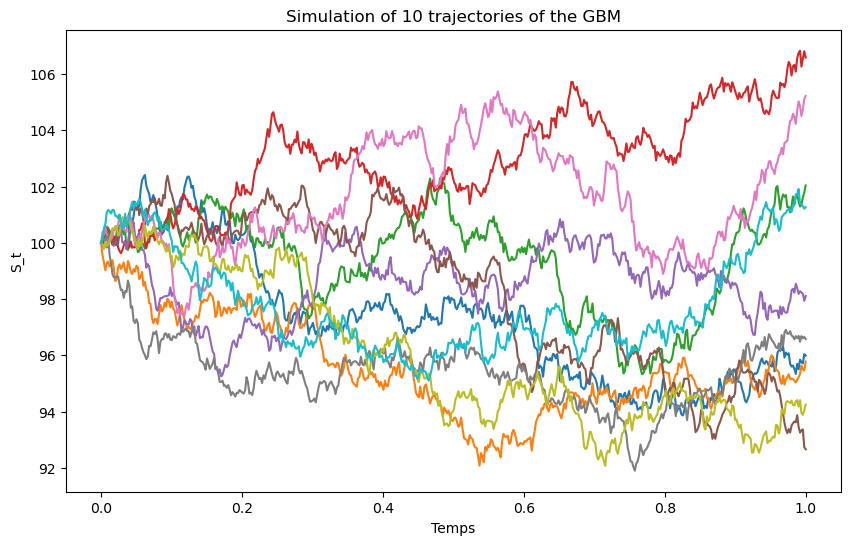

In [12]:
# Timeline
t_0 = 0
T = 1
n = 500
timeline = np.linspace(t_0, T, n)

# Parameters
mu = 0.01
sigma = 0.05
s_0 = 100

# Number of trajectories
number_trajectories = 10

# Figure initialisation
plt.figure(figsize=(10, 6))

def gbm_trajectory(s_0, n, t_0, T, mu, sigma):
    trajectory = np.zeros(n)
    trajectory[0] = s_0
    dt = (T-t_0)/(n-1) # because n is the number of points
    for i in range(1, n) :
        Z_i = np.random.normal(0, 1)
        exponential_term = np.exp((mu - (1/2)*sigma**2)*dt + sigma * np.sqrt(dt) * Z_i)
        trajectory[i] = trajectory[i-1]*exponential_term
    return trajectory

for i in range(number_trajectories):
    new_trajectory = gbm_trajectory(s_0, n, t_0, T, mu, sigma)
    plt.plot(timeline, new_trajectory)

plt.title(f'Simulation of {number_trajectories} trajectories of the GBM')
plt.xlabel('Temps')
plt.ylabel('S_t')
plt.show()

Subtilities in the implementation :

- The choice of $T, \mu, \sigma$

### GARCH model

Model :
\begin{align*}
    \frac{\Delta S_{t_i}}{S_{t_i}} = \mu \Delta t_i + \sigma_{t_i} \Delta W_{t_i} &&
    \sigma_{t_i} = \omega \overline{\sigma}^{2} + \alpha \sigma_{t_{i-1}}^{2} + \beta \epsilon_{t_{i-1}}^{2} &&
    \epsilon_{t_{i}}^{2} = (\sigma_{t_i} \Delta W_{t_i})^{2}
\end{align*}

So, again, we simulate $\Delta W_{t_i}$ by $\sqrt{t_i - t_{i-1}}Z_{t_i}$ where $Z_{t_i} \sim \mathcal{N}(0,1)$ and $(Z_{t_i})_{i}$ are independant.  
What's more, as we are in discrete time, there is no Ito's integral and the implementation is more direct

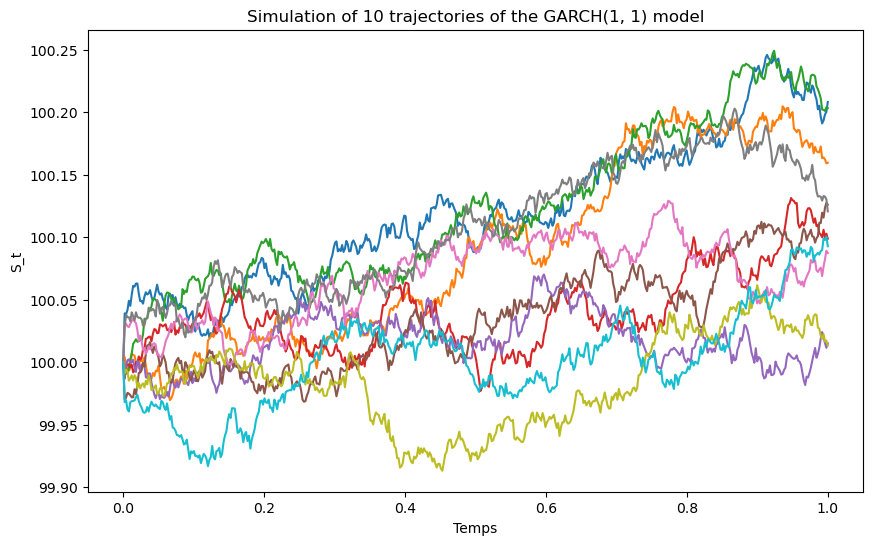

In [13]:
# Timeline
t_0 = 0
T = 1
n = 500
timeline = np.linspace(t_0, T, n)

# Parameters
mu = 0.001
sigma_0 = 0.005
sigma_offset_square = 0.05**2
s_0 = 100
# be careful : omega + alpha + beta = 1
omega = 0.4
alpha = 0.3
beta = 0.3

# Number of trajectories
number_trajectories = 10

# Figure initialisation
plt.figure(figsize=(10, 6))

def garch_model(s_0, n, t_0, T, mu, sigma_0, sigma_offset_square, omega, alpha, beta):
    dt = (T-t_0)/(n-1) # because n is the number of points
    
    trajectory = np.zeros(n)
    sigma = np.zeros(n)
    epsilon_square = np.zeros(n)
    trajectory[0] = s_0
    sigma[0] = sigma_0
    epsilon_square[0] = (sigma_0 * np.sqrt(dt) * np.random.normal(0, 1))**2
    for i in range(1, n) :
        # here we compute the ith price
        Z_i = np.random.normal(0, 1)

        trajectory[i] = trajectory[i-1] * (1 + mu * dt + sigma[i-1] * np.sqrt(dt) * Z_i)

        sigma[i] = omega * sigma_offset_square + alpha * sigma[i-1]**2 + beta * epsilon_square[i-1]
        epsilon_square[i] = (sigma[i] * np.sqrt(dt) * Z_i)**2
    return trajectory

for i in range(number_trajectories):
    new_trajectory = garch_model(s_0, n, t_0, T, mu, sigma_0, sigma_offset_square, omega, alpha, beta)
    plt.plot(timeline, new_trajectory)

plt.title(f'Simulation of {number_trajectories} trajectories of the GARCH(1, 1) model')
plt.xlabel('Temps')
plt.ylabel('S_t')
plt.show()

Subtilities in the implementation :

- The choice of $T, \mu, \sigma_0, \overline{\sigma}, \omega, \alpha, \beta$

### NGARCH model

Model :
\begin{align*}
    \frac{\Delta S_{t_i}}{S_{t_i}} = \mu \Delta t_i + \sigma_{t_i} \Delta W_{t_i} &&
    \sigma_{t_i} = \omega \overline{\sigma}^{2} + \alpha \sigma_{t_{i-1}}^{2} + \beta (\epsilon_{t_{i-1}} - \gamma \sigma)^{2}&&
    \epsilon_{t_{i}}^{2} = (\sigma_{t_i} \Delta W)^{2}
\end{align*}

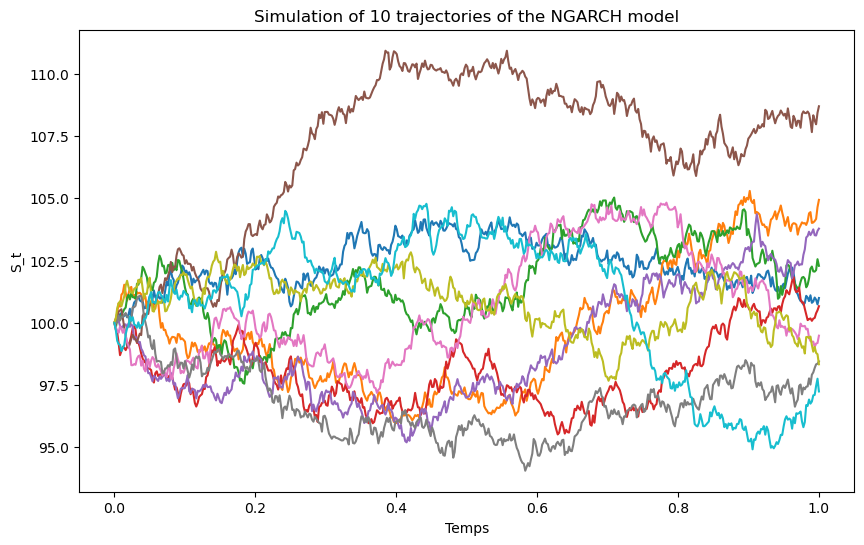

In [14]:
# Timeline
t_0 = 0
T = 1
n = 500
timeline = np.linspace(t_0, T, n)

# Parameters
mu = 0.001
sigma_0 = 0.05
sigma_offset_square = 0.5**2
s_0 = 100
# be careful : omega, alpha, beta > 0 and alpha + beta * (1 + gamma**2) < 1
omega = 0.2
alpha = 0.4
beta = 0.4
gamma = 0.3

# Number of trajectories
number_trajectories = 10

# Figure initialisation
plt.figure(figsize=(10, 6))

def ngarch_model(s_0, n, t_0, T, mu, sigma_0, sigma_offset_square, omega, alpha, beta, gamma):
    dt = (T-t_0)/(n-1) # because n is the number of points
    
    trajectory = np.zeros(n)
    sigma = np.zeros(n)
    epsilon = np.zeros(n)
    trajectory[0] = s_0
    sigma[0] = sigma_0
    epsilon[0] = sigma_0 * np.sqrt(dt) * np.random.normal(0, 1)
    for i in range(1, n) :
        # here we compute the ith price
        Z_i = np.random.normal(0, 1)

        trajectory[i] = trajectory[i-1] * (1 + mu * dt + sigma[i-1] * np.sqrt(dt) * Z_i)

        sigma[i] = omega * sigma_offset_square + alpha * sigma[i-1]**2 + beta * (epsilon[i-1] - gamma * sigma[i-1])**2
        epsilon[i] = sigma[i] * np.sqrt(dt) * Z_i
    return trajectory

for i in range(number_trajectories):
    new_trajectory = ngarch_model(s_0, n, t_0, T, mu, sigma_0, sigma_offset_square, omega, alpha, beta, gamma)
    plt.plot(timeline, new_trajectory)

plt.title(f'Simulation of {number_trajectories} trajectories of the NGARCH model')
plt.xlabel('Temps')
plt.ylabel('S_t')
plt.show()

### Jump Diffusion Models

$dS_t = \mu S_t dt + \sigma S_t dW_t + S_t dJ_t$  

where $dJ_t = (Y_{N_t} - 1)dN_t$ où $(N_t)_t$ is a Poisson point process.  

And so,  

$X_t = \Delta \log(S_t) = \mu^{*} \Delta t + \sigma * \sqrt{\Delta t} \epsilon_t + \Delta J_t^{*}$  

where : 
\begin{align*}
    \Delta J_t^{*} = \sum_{j = 1}^{n_t} \log(Y_j) - \lambda \Delta t \mu_Y \quad \quad \mu^{*} = (\mu + \lambda \mu_Y - \frac{1}{2}\sigma^{2})
\end{align*}

$\textbf{How to simulate $N_t$ ?}$

Since $(N_t)_t$ is a Poisson point process, $N_{t_i} - N_{t_{i-1}} \sim \mathcal{P}(\lambda (t_i - t_{i-1}))$

$\textbf{How to simulate $N_{0}$ ?}$

Since $(N_t)_t$ is a point process, $N_{0} = 0$

$\textbf{How to simulate $Y_j$ ?}$

Be careful, at each step, the $Y_j$ are different !

$\textbf{The effect of the jump}$

If $\mu_Y$ is too low, the jump effect will be too strong and the asset price will collapse. Be careful with the choice of the parameters.
In particular, I didn't use $\mu_Y = 0.3$, the value mentionned in the article.

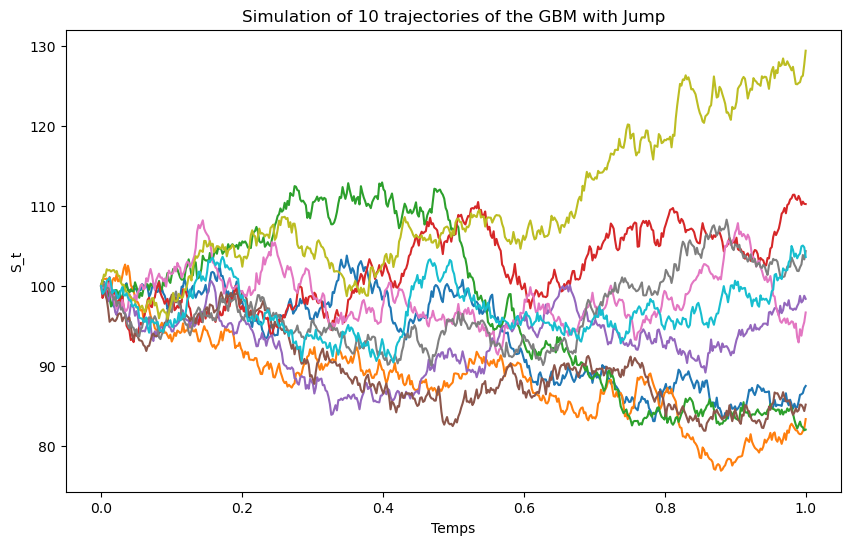

In [15]:
# Timeline
t_0 = 0
T = 1
n = 500
timeline = np.linspace(t_0, T, n)

# Parameters
sigma = 0.15
mu_Y = 1
sigma_Y = 0.001
lambda_param = 10
mu = 0.001
s_0 = 100

# Number of trajectories
number_trajectories = 10

# Figure initialisation
plt.figure(figsize=(10, 6))

def gbm_with_jump(s_0, n, t_0, T, mu, sigma, mu_Y, sigma_Y, lambda_param):
    dt = (T-t_0)/(n-1) # because n is the number of points
    
    trajectory = np.zeros(n)
    trajectory[0] = s_0

    mu_star = (mu + lambda_param * mu_Y - (1/2)*sigma**2)
    for i in range(1, n) :
        # here we compute the ith price
        epsilon_i = np.random.normal(0, 1)
        number_of_jumps = np.random.poisson(lambda_param * dt)

        jump_term = 1
        for _ in range(number_of_jumps):
            jump_term *= np.random.normal(mu_Y, sigma_Y)
        trajectory[i] = trajectory[i-1] * np.exp((mu - (sigma**2 / 2)) * dt + sigma * np.sqrt(dt) * epsilon_i) * jump_term
        
    return trajectory
    
for i in range(number_trajectories):
    new_trajectory = gbm_with_jump(s_0, n, t_0, T, mu, sigma, mu_Y, sigma_Y, lambda_param)
    plt.plot(timeline, new_trajectory)

plt.title(f'Simulation of {number_trajectories} tra-type de sigma * njectories of the GBM with Jump')
plt.xlabel('Temps')
plt.ylabel('S_t')
plt.show()

Let's simulate $log(S_t)$ now

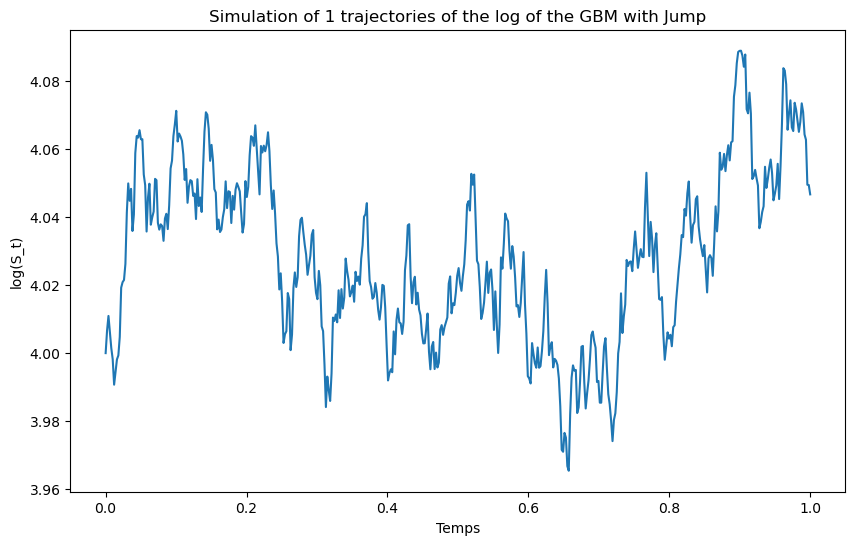

In [28]:
# Timeline
t_0 = 0
T = 1
n = 500
timeline = np.linspace(t_0, T, n)

# Parameters
sigma = 0.15
mu_Y = 1
sigma_Y = 0.001
lambda_param = 10
mu = 0.001
log_s_0 = 4

# Number of trajectories
number_trajectories = 1

# Figure initialisation
plt.figure(figsize=(10, 6))

def gbm_with_jump_log(log_s_0, n, t_0, T, mu, sigma, mu_Y, sigma_Y, lambda_param):
    dt = (T-t_0)/(n-1) # because n is the number of points
    
    log_trajectory = np.zeros(n)
    log_trajectory[0] = log_s_0

    mu_star = (mu + lambda_param * mu_Y - (1/2)*sigma**2)
    for i in range(1, n) :
        # here we compute the ith price
        epsilon_i = np.random.normal(0, 1)
        number_of_jumps = np.random.poisson(lambda_param * dt)

        jump_term = -lambda_param * dt * mu_Y
        for _ in range(number_of_jumps):
            jump_term += np.log(np.random.normal(mu_Y, sigma_Y))
        
        log_trajectory[i] = log_trajectory[i-1] + mu_star * dt + sigma * np.sqrt(dt) * epsilon_i + jump_term
        
    return log_trajectory
    
for i in range(number_trajectories):
    new_trajectory = gbm_with_jump_log(log_s_0, n, t_0, T, mu, sigma, mu_Y, sigma_Y, lambda_param)
    plt.plot(timeline, new_trajectory)

plt.title(f'Simulation of {number_trajectories} trajectories of the log of the GBM with Jump')
plt.xlabel('Temps')
plt.ylabel('log(S_t)')
plt.show()

### The Variance Gamma (VG) process

In this model, the asset price verify :  
$d\log S_t = \overline{\mu}dt + \overline{\theta} dg(t) + \overline{\sigma} dW(g(t))$

where $(g(t))_t$ is a subordinador independant from $(W_t)_t$ such that $g(t) \sim \Gamma(\frac{t}{\nu}, \nu)$.  

One can show that $\forall t \leq u, (\log(S_u/S_t) - \overline{\mu}(u-t))|_g \sim \mathcal{N}(\overline{\theta}(g(u) - g(t), \overline{\sigma}^{2}(g(u) - g(t))))$  

And by property of the gamma law, $g(u) - g(t) \sim \Gamma(\frac{u - t}{\nu}, \nu)$

$\textbf{Implementation principle :}$  

Using : $\log S_u = \log S_t + \log(S_u / S_t)$

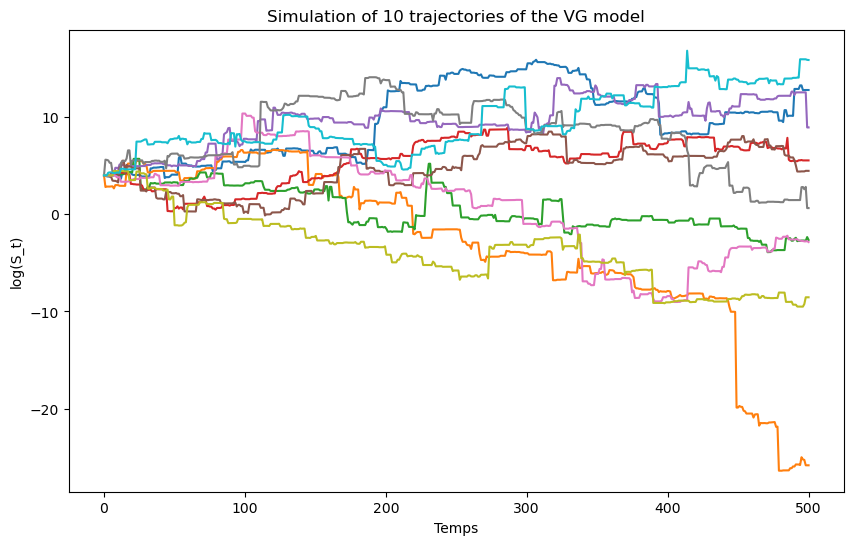

In [16]:
# Timeline
t_0 = 0
T = 500
n = 500
timeline = np.linspace(t_0, T, n)

# Parameters
mu = 0
theta = 0
sigma = 0.4
nu = 6
log_s_0 = 4

# Number of trajectories
number_trajectories = 10

# Figure initialisation
plt.figure(figsize=(10, 6))

def vg_model(log_s_0, n, t_0, T, mu, theta, sigma, nu):
    dt = (T-t_0)/(n-1) # because n is the number of points
    
    log_trajectory = np.zeros(n)
    log_trajectory[0] = log_s_0

    for i in range(1, n) :
        g_difference = np.random.gamma((dt / nu), nu)

        law_log_factor_i = np.random.normal(theta * g_difference + mu * dt, sigma**2 * g_difference)
        
        log_trajectory[i] = log_trajectory[i-1] + law_log_factor_i
        
    return log_trajectory
    
for i in range(number_trajectories):
    new_trajectory = vg_model(log_s_0, n, t_0, T, mu, theta, sigma, nu)
    plt.plot(timeline, new_trajectory)

plt.title(f'Simulation of {number_trajectories} trajectories of the VG model')
plt.xlabel('Temps')
plt.ylabel('log(S_t)')
plt.show()

### Comparison of $W_t$ et $W_{g(t)}$

Let's compare the two models:

$d\log S_t = \sigma_1 dW_t \quad \text{and} \quad d\log S_t = \sigma_2 dW_{g(t)}$

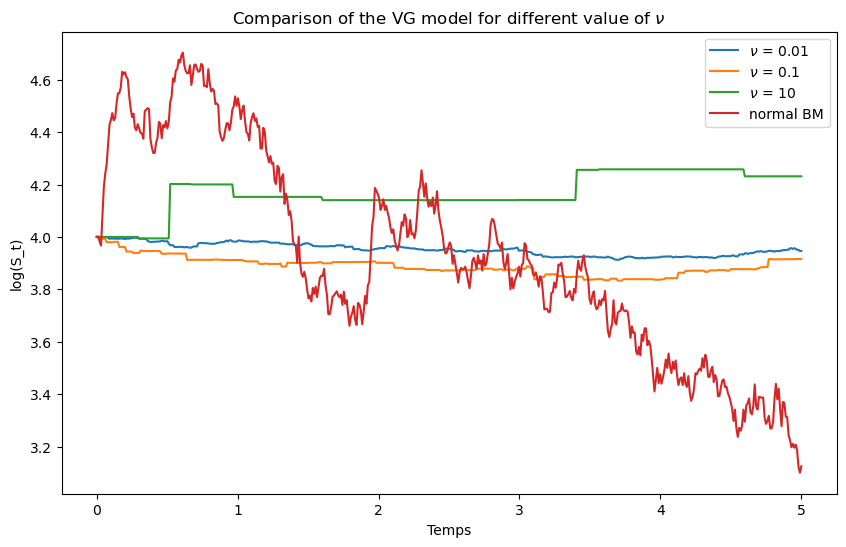

In [17]:
# Timeline
t_0 = 0
T = 5
n = 500
timeline = np.linspace(t_0, T, n)

# Parameters
mu = 0
theta = 0
sigma_2 = 0.4
nu = 100
log_s_0 = 4

sigma_1 = 0.4

# Number of trajectories
number_trajectories_brownian = 1
number_trajectories_brownian_market_time = 1

# Figure initialisation
plt.figure(figsize=(10, 6))

def brownian_model(log_s_0, n, t_0, T, sigma_1):
    dt = (T-t_0)/(n-1) # because n is the number of points
    log_trajectory = np.zeros(n)
    log_trajectory[0] = log_s_0

    for i in range(1, n) :  
        epsilon_i = np.random.normal(0, 1)
        log_trajectory[i] = log_trajectory[i-1] + sigma_1 * np.sqrt(dt) * epsilon_i
        
    return log_trajectory

range_nu_values = [0.01, 0.1, 10]

for nu in range_nu_values:
    new_trajectory = vg_model(log_s_0, n, t_0, T, mu, theta, sigma, nu)
    plt.plot(timeline, new_trajectory, label = fr'$\nu$ = {nu}')
    
for i in range(number_trajectories_brownian_market_time):
    new_trajectory = brownian_model(log_s_0, n, t_0, T, sigma)
    plt.plot(timeline, new_trajectory, label = "normal BM")

plt.legend(loc='best')
plt.title(fr'Comparison of the VG model for different value of $\nu$')
plt.xlabel('Temps')
plt.ylabel('log(S_t)')
plt.show()

Noticed : with a low value of $\nu$, the fat tail feature of the VG model is totally eliminated  

### The Vasicek Model

$dx_t = \alpha (\theta - x_t)dt + \sigma dW_t$  
So, $x_t = x_0 + \int_{0}^{t} \alpha (\theta - x_s)ds +  \int_{0}^{t} \sigma dW_s$  

One defines $f : (x, t) \mapsto (x - \theta)e^{\alpha t}$ qui est $\mathcal{C^{\infty}}$  
According to the Ito's formula,  
$f(x_t, t) = - \theta + \int_{0}^{t} \alpha (x_s - \theta )e^{\alpha s}ds + \int_{0}^{t} e^{\alpha s} dx_s$  
So, $f(x_t, t) = - \theta + \int_{0}^{t} \alpha (x_s - \theta )e^{\alpha s}ds + \int_{0}^{t} e^{\alpha s}\alpha (\theta - x_t)ds + \int_{0}^{t} e^{\alpha s}\sigma dW_s $  
So, $f(x_t, t) = - \theta + \int_{0}^{t} e^{\alpha s}\sigma dW_s$  
So, $x_te^{\alpha t} = -\theta + \theta e^{\alpha t} + \int_{0}^{t}e^{\alpha s}\sigma dW_s$  
So, $x_{t_i}e^{\alpha t_i} - x_{t_{i-1}}e^{\alpha t_{i-1}} = \theta e^{\alpha t_i} - \theta e^{\alpha t_{i-1}} + \int_{t_{i-1}}^{t_i}e^{\alpha s}\sigma dW_s$  
So, $x_{t_i} = \theta (1 - e^{-\alpha(t_{i} - t_{i-1})}) + x_{t_{i-1}} e^{-\alpha(t_i - t_{i-1})} + \sigma e^{-\alpha t_{i}} \int_{t_{i-1}}^{t_i}e^{\alpha s}dW_s$  

How to simulate $\int_{t_{i-1}}^{t_i}e^{\alpha s}dW_s$ ?

$\int_{t_{i-1}}^{t_i}e^{\alpha s}dW_s = \int_{0}^{t_i}e^{\alpha s}dW_s - \int_{0}^{t_{i-1}}e^{\alpha s}dW_s$  

So, $Var(\int_{t_{i-1}}^{t_i}e^{\alpha s}dW_s) = Var(\int_{0}^{t_i}e^{\alpha s}dW_s) + Var(\int_{0}^{t_{i-1}}e^{\alpha s}dW_s) - 2 * cov(\int_{0}^{t_i}e^{\alpha s}dW_s, \int_{0}^{t_{i-1}}e^{\alpha s}dW_s) = \int_{t_{i-1}}^{t_i}e^{2\alpha s} ds = \frac{1}{2\alpha}e^{2\alpha(t_{i} - t_{i-1})}$

And as $\int_{t_{i-1}}^{t_i}e^{\alpha s}dW_s$ is a centered gaussian, $\int_{t_{i-1}}^{t_i}e^{\alpha s}dW_s \sim \mathcal{N}(0, \frac{1}{2\alpha}e^{2\alpha(t_{i} - t_{i-1})})$  

And $(\int_{t_{i-1}}^{t_i}e^{\alpha s}dW_s)_i$ are independant.  

So, we can simulate $\int_{t_{i-1}}^{t_i}e^{\alpha s}dW_s$ by $\sqrt{\frac{1}{2\alpha}e^{2\alpha(t_{i} - t_{i-1})}} \epsilon(t_i)$ where $\epsilon(t_i) \sim \mathcal{N}(0, 1)$ and where $(\epsilon(t_i))_i$ are independant.  

And so, finally, $x_{t_i} = c + b x_{t_{i-1}} + \delta \epsilon(t_i)$  
where, with $\Delta t = t_i - t_{i-1}$, $c = \theta(1 - e^{-\alpha\Delta t})$, $b = e^{-\alpha \Delta t}$ and $\delta = \sigma \sqrt{\frac{1 - e{-2\alpha\Delta t}}{2\alpha}}$
 

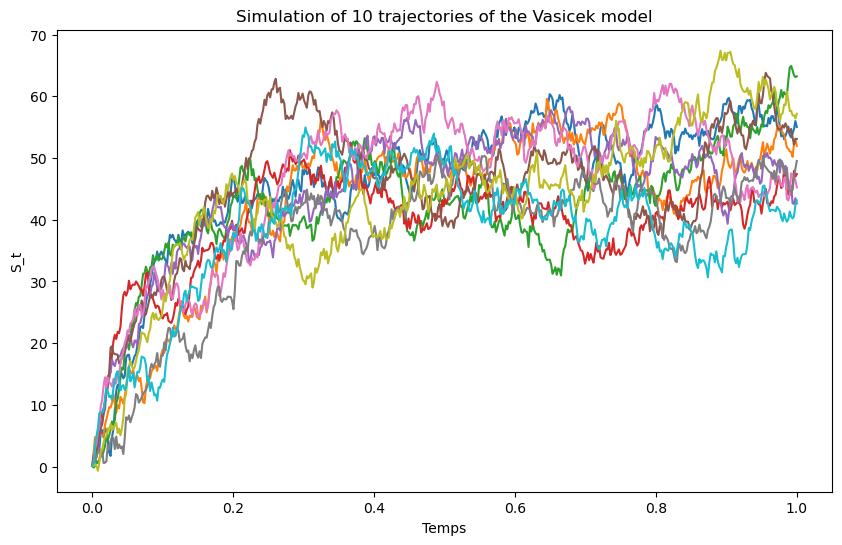

In [19]:
# Timeline
t_0 = 0
T = 1
n = 500
timeline = np.linspace(t_0, T, n)

# Parameters
alpha = 8
theta = 50
sigma = 25
x_0 = 0.1

# Number of trajectories
number_trajectories = 10

# Figure initialisation
plt.figure(figsize=(10, 6))

def vasicek_model(x_0, n, t_0, T, alpha, theta, sigma):
    trajectory = np.zeros(n)
    trajectory[0] = x_0
    dt = (T-t_0)/(n-1)

    c = theta * (1 - np.exp(-alpha * dt))
    b = np.exp(-alpha * dt)
    delta = sigma * np.sqrt((1 - np.exp(-2 * alpha * dt))/(2 * alpha))
    
    for i in range(1, n):
        epsilon_i = np.random.normal(0, 1)
        trajectory[i] = c + b * trajectory[i-1] + delta * epsilon_i
        
    return trajectory
for i in range(number_trajectories):
    new_trajectory = vasicek_model(x_0, n, t_0, T, alpha, theta, sigma)
    plt.plot(timeline, new_trajectory)

plt.title(f'Simulation of {number_trajectories} trajectories of the Vasicek model')
plt.xlabel('Temps')
plt.ylabel('S_t')
plt.show()

### The exponential Vasicek Model

Model :
$dx_t = \alpha x_t (m - \log x_t)dt + \sigma x_t dW_t$  
...  
$x_t = \exp(\theta (1 - e^{-\alpha(t-s)}) + \log(x_s)e^{-\alpha(t-s)} + \sigma e^{-\alpha t}\int_{s}^{t}e^{\alpha u}dW_u)$

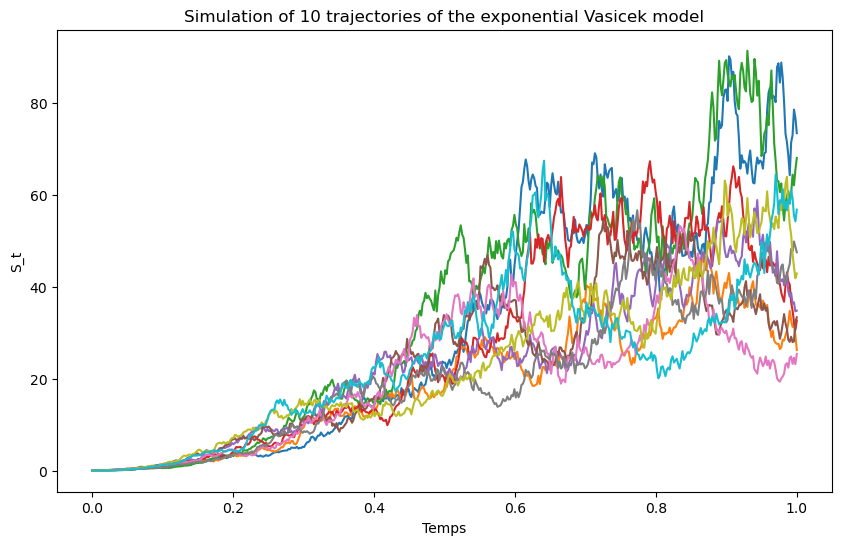

In [20]:
# Timeline
t_0 = 0
T = 1
n = 500
timeline = np.linspace(t_0, T, n)

# Parameters
alpha = 4.9701
theta = 3.8307
sigma = 1.14061
x_0 = 0.1

# Number of trajectories
number_trajectories = 10

# Figure initialisation
plt.figure(figsize=(10, 6))

def exponential_vasicek_model(x_0, n, t_0, T, alpha, theta, sigma):
    trajectory = np.zeros(n)
    trajectory[0] = x_0
    dt = (T-t_0)/(n-1)

    c = theta * (1 - np.exp(-alpha * dt))
    b = np.exp(-alpha * dt)
    delta = sigma * np.sqrt((1 - np.exp(-2 * alpha * dt))/(2 * alpha))
    
    for i in range(1, n):
        epsilon_i = np.random.normal(0, 1)
        trajectory[i] = np.exp(c + b * np.log(trajectory[i-1]) + delta * epsilon_i)
        
    return trajectory
for i in range(number_trajectories):
    new_trajectory = exponential_vasicek_model(x_0, n, t_0, T, alpha, theta, sigma)
    plt.plot(timeline, new_trajectory)

plt.title(f'Simulation of {number_trajectories} trajectories of the exponential Vasicek model')
plt.xlabel('Temps')
plt.ylabel('S_t')
plt.show()

### The CIR Model

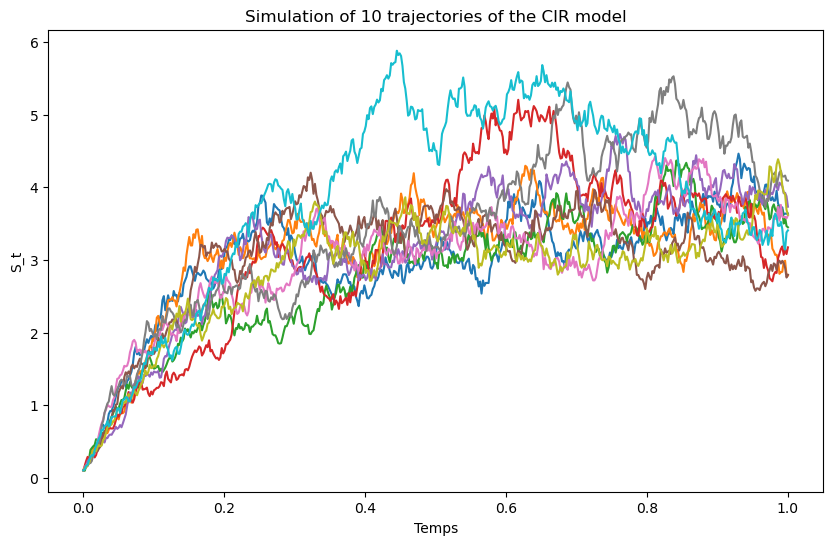

In [21]:
# Timeline
t_0 = 0
T = 1
n = 500
timeline = np.linspace(t_0, T, n)

# Parameters
# be careful : sigma**2 < 2 * alpha * theta
alpha = 4.9701
theta = 3.8307
sigma = 1.14061
x_0 = 0.1

# Number of trajectories
number_trajectories = 10

# Figure initialisation 
plt.figure(figsize=(10, 6))

def cir_model(x_0, n, t_0, T, alpha, theta, sigma):
    trajectory = np.zeros(n)
    trajectory[0] = x_0
    dt = (T-t_0)/(n-1)
    
    for i in range(1, n):
        epsilon_i = np.random.normal(0, 1)
        trajectory[i] = alpha * theta * dt + (1 - alpha * dt) * trajectory[i-1] + sigma * np.sqrt(trajectory[i-1] * dt) * epsilon_i
        
    return trajectory
for i in range(number_trajectories):
    new_trajectory = cir_model(x_0, n, t_0, T, alpha, theta, sigma)
    plt.plot(timeline, new_trajectory)

plt.title(f'Simulation of {number_trajectories} trajectories of the CIR model')
plt.xlabel('Temps')
plt.ylabel('S_t')
plt.show()

But we can also show that $(x_{t_i} | x_{t_{i-1}})$ follows the law $\frac{1}{2c}\chi_d(\lambda)$, i.e the non-central $\chi_2$ distributed with $d$ degrees of freedom and with the non-central parameter $\lambda$ 

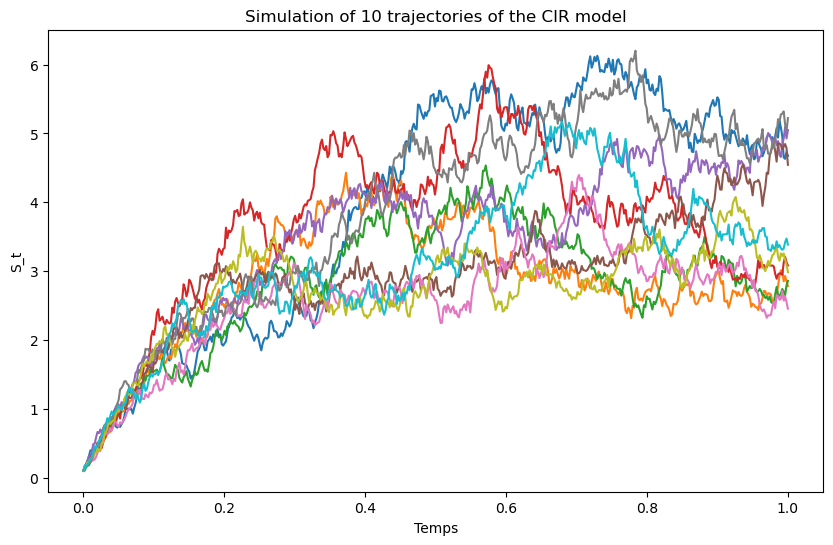

In [22]:
# Timeline
t_0 = 0
T = 1
n = 500
timeline = np.linspace(t_0, T, n)

# Parameters
# be careful : sigma**2 < 2 * alpha * theta
alpha = 4.9701
theta = 3.8307
sigma = 1.14061
x_0 = 0.1

# Number of trajectories
number_trajectories = 10

# Figure initialisation
plt.figure(figsize=(10, 6))

def cir_model_with_chi_2(x_0, n, t_0, T, alpha, theta, sigma):
    trajectory = np.zeros(n)
    trajectory[0] = x_0
    dt = (T-t_0)/(n-1)

    c = (2 * alpha) / ((sigma**2) * (1 - np.exp(-alpha * dt)))
    d = (4 * alpha * theta) / (sigma**2)
    
    for i in range(1, n):
        lambda_param = 2 * c * trajectory[i-1] * np.exp(- alpha * dt)
        trajectory[i] = (1/(2*c)) * np.random.noncentral_chisquare(d, lambda_param)
        
    return trajectory
for i in range(number_trajectories):
    new_trajectory = cir_model_with_chi_2(x_0, n, t_0, T, alpha, theta, sigma)
    plt.plot(timeline, new_trajectory)

plt.title(f'Simulation of {number_trajectories} trajectories of the CIR model')
plt.xlabel('Temps')
plt.ylabel('S_t')
plt.show()

### Fat tails and mean reversion together : Vasicek Model + Jump Diffusion Model

Model SDE :

$dx(t) = \alpha(\theta - x(t))dt + \sigma dW_t + dJ_t $  

Where $dJ_t = Y_{N_t}dN_t$

One can prove that, in the case of a gaussian jump (i.e. $\forall j, Y_j \sim \mathcal{N}(\mu_Y, \sigma_Y)$)  :  

$f_{x(t) | x(t - \Delta t)} = \lambda \Delta_t f_{\mathcal{N}}(x ; m_x(\Delta t, x(t - \Delta t)) + \mu_Y, v_x(\Delta_t) + \sigma_Y^{2}) + (1 - \lambda \Delta t) f_{\mathcal{N}}(x;  m_x(\Delta t, x(t - \Delta t)), v_x(\Delta_t))$ 

where $m_x(t - s, x_s) = \theta (1 - e^{-\alpha(t - s)}) + x_s e^{-\alpha(t - s)}$  
and $v_x(t - s) = \frac{\sigma^{2}}{2\alpha}(1 - e^{-2 \alpha(t - s)})$

$\textbf{How to simulate the random variable associated to this density ?}$

Be careful, $\lambda \Delta t$ is a probability so it must be in $[0, 1]$  

Let's define the random variable $X$ associated to the density $f_X = \sum\limits_{i=1}^{n} \lambda_i f_i$, and the random variable $(X_i)_i$ associated to the densities $(f_i)_i$. What's more, let's also define :  

$\nu : \Omega \rightarrow [|1, n|]$ such that $P(\nu = i) = \lambda_i$  

Then to simulate $X$ one can :  

- Simulate $\nu$
- Simulate $X_{\nu}$

lambda * dt :  0.6012024048096192


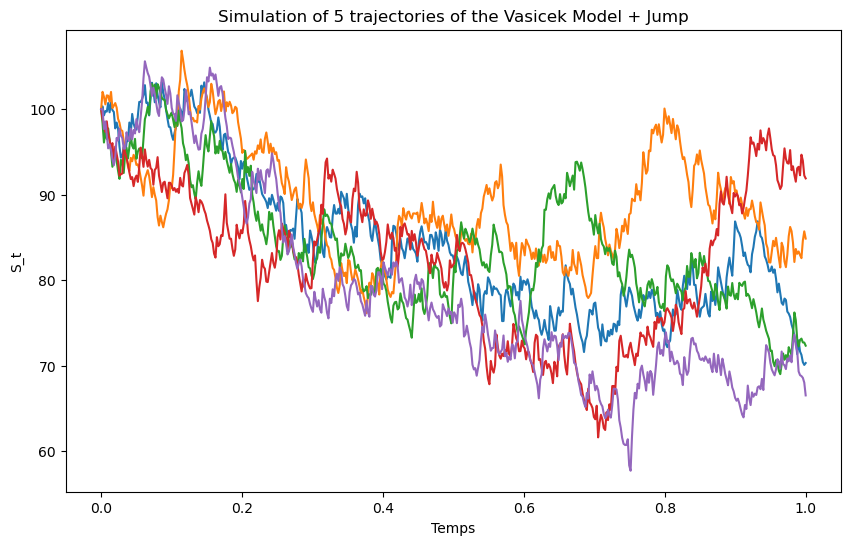

In [23]:
# Timeline
t_0 = 0
T = 1
n = 500
dt = (T-t_0)/(n-1)
timeline = np.linspace(t_0, T, n)

# Parameters
# be careful : sigma**2 < 2 * alpha * theta
alpha = 4.9701
theta = 3.8307
sigma = 1.14061
sigma_square = 7
mu_Y = 1.2
sigma_Y_square = 1
lambda_param = 300
x_0 = 100

print('lambda * dt : ', lambda_param*dt)

# Number of trajectories
number_trajectories = 5

# Figure initialisation
plt.figure(figsize=(10, 6))

def vasicek_plus_gaussian_jump(x_0, n, dt, alpha, theta, sigma_square, mu_Y, sigma_Y_square, lambda_param):
    trajectory = np.zeros(n)
    trajectory[0] = x_0

    for i in range(1, n):
        m_x = theta * (1 - np.exp(-alpha * dt)) + trajectory[i-1] * np.exp(-alpha * dt)
        v_x = (sigma_square / 2 * alpha) * (1 - np.exp(-2*alpha*dt))

        nu_sample = np.random.rand()
        if nu_sample <= lambda_param * dt :
            trajectory[i] = np.random.normal(m_x + mu_Y, v_x + sigma_Y_square)
        else :
            trajectory[i] = np.random.normal(m_x, v_x)
            
    return trajectory
for i in range(number_trajectories):
    new_trajectory = vasicek_plus_gaussian_jump(x_0, n, dt, alpha, theta, sigma_square, mu_Y, sigma_Y_square, lambda_param)
    plt.plot(timeline, new_trajectory)

plt.title(f'Simulation of {number_trajectories} trajectories of the Vasicek Model + Jump')
plt.xlabel('Temps')
plt.ylabel('S_t')
plt.show()

Model SDE with a second jump process:

$dx(t) = \alpha(\theta - x(t))dt + \sigma dW_t + dJ_t^{+} + dJ_t^{-} $  

Where $dJ_t^{+} = Y_{N_t}dN_t \quad \text{and} \quad dJ_t^{-} = Z_{N_t}dN_t$

One can prove that, in the case of gaussian jumps (i.e. $\forall j, Y_j \sim \mathcal{N}(\mu_Y, \sigma_Y) \wedge Z_j \sim \mathcal{N}(\mu_Z, \sigma_Z)$)  :  

$f_{x(t) | x(t - \Delta t)} = \lambda_{+} \Delta_t f_{\mathcal{N}}(x ; m_x(\Delta t, x(t - \Delta t)) + \mu_Y, v_x(\Delta_t) + \sigma_Y^{2}) + \lambda_{-} \Delta t f_{\mathcal{N}}(x;  m_x(\Delta t, x(t - \Delta t)) - \mu_Z, v_x(\Delta_t) + \sigma_Z^{2}) + (1 - (\lambda_{+}- \lambda_{-})\Delta t) f_{\mathcal{N}}(x ; m_x(\Delta t, x(t - \Delta t)), v_x(\Delta_t))$  

where $m_x(t - s, x_s) = \theta (1 - e^{-\alpha(t - s)}) + x_s e^{-\alpha(t - s)}$  
and $v_x(t - s) = \frac{\sigma^{2}}{2\alpha}(1 - e^{-2 \alpha(t - s)})$

lambda_+ * dt :  0.6012024048096192
lambda_- * dt :  0.2004008016032064


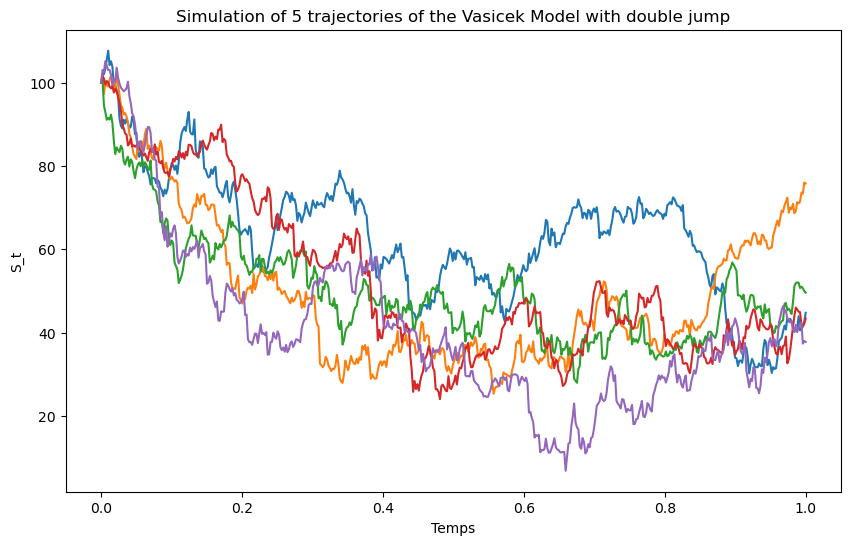

In [24]:
# Timeline
t_0 = 0
T = 1
n = 500
dt = (T-t_0)/(n-1)
timeline = np.linspace(t_0, T, n)

# Parameters
# be careful : sigma**2 < 2 * alpha * theta
alpha = 4.9701
theta = 3.8307
sigma = 1.14061
sigma_square = 7
mu_Y = 1.2
sigma_Y_square = 1
mu_Z = 1.8
sigma_Z_square = 2
lambda_plus = 300
lambda_minus = 100
x_0 = 100

print('lambda_+ * dt : ', lambda_plus * dt)
print('lambda_- * dt : ', lambda_minus * dt)

# Number of trajectories
number_trajectories = 5

# Figure initialisation
plt.figure(figsize=(10, 6))

def vasicek_plus_double_gaussian_jump(x_0, n, dt, alpha, theta, sigma_square, mu_Y, sigma_Y_square, mu_Z, sigma_Z_square, lambda_plus, lambda_minus):
    trajectory = np.zeros(n)
    trajectory[0] = x_0

    for i in range(1, n):
        m_x = theta * (1 - np.exp(-alpha * dt)) + trajectory[i-1] * np.exp(-alpha * dt)
        v_x = (sigma_square / 2 * alpha) * (1 - np.exp(-2*alpha*dt))

        nu_sample = np.random.rand()
        if nu_sample <= lambda_plus * dt :
            trajectory[i] = np.random.normal(m_x + mu_Y, v_x + sigma_Y_square)

        elif nu_sample <= lambda_plus * dt + lambda_minus * dt :
            trajectory[i] = np.random.normal(m_x - mu_Z, v_x + sigma_Z_square)
        else :
            trajectory[i] = np.random.normal(m_x, v_x)
            
    return trajectory
for i in range(number_trajectories):
    new_trajectory = vasicek_plus_double_gaussian_jump(x_0, n, dt, alpha, theta, sigma_square, mu_Y, sigma_Y_square, mu_Z, sigma_Z_square, lambda_plus, lambda_minus)
    plt.plot(timeline, new_trajectory)

plt.title(f'Simulation of {number_trajectories} trajectories of the Vasicek Model with double jump')
plt.xlabel('Temps')
plt.ylabel('S_t')
plt.show()